# installing necessary Modules

In [34]:
pip install pandas numpy scikit-learn matplotlib seaborn

# importing all the necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme(style="whitegrid")

# loading datasets

In [36]:
# loading datasets
location1 = pd.read_csv('Location1.csv')
location2 = pd.read_csv('Location2.csv')
location3 = pd.read_csv('Location3.csv')
location4 = pd.read_csv('Location4.csv')

# Adding a new column 'Location' to every csv files to identify the location

In [37]:
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

print("Merged Data Head:")
merged_data.head()

Merged Data Head:


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


# Saving the merged dataset to a new CSV file

In [38]:
merged_data.to_csv('merged_locations.csv', index=False)

# Initial Data Inspection

In [39]:
# see the basic information about the dataset
print("\nDataset Info:")
merged_data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [40]:
# To check the duplicated rows
print(f"\nNumber of duplicate rows: {merged_data.duplicated().sum()}")


Number of duplicate rows: 0


# Data Cleaning & Preprocessing

## Remove Timestamp Column

In [41]:
# remove the 'Time' column
if 'Time' in merged_data.columns:
    merged_data = merged_data.drop('Time', axis=1)
    print("\n'Time' column dropped.")
else:
    print("\n'Time' column not found.")


'Time' column dropped.


# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Target Variable: Power

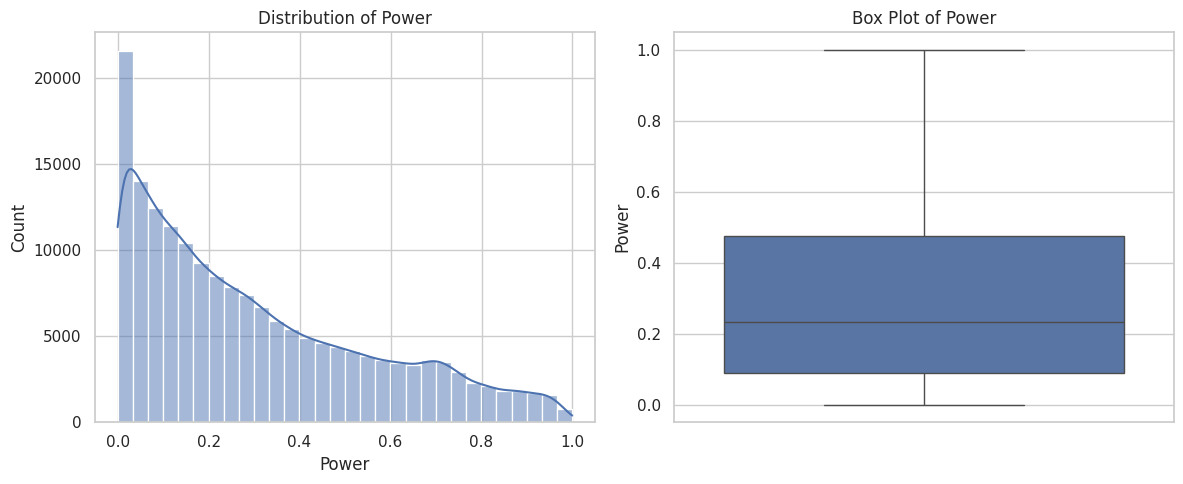

In [42]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(merged_data['Power'], kde=True, bins=30)
plt.title('Distribution of Power')

plt.subplot(1, 2, 2)
sns.boxplot(y=merged_data['Power'])
plt.title('Box Plot of Power')

plt.tight_layout()
plt.show()

### Numerical Features


Distributions of Numerical Features:


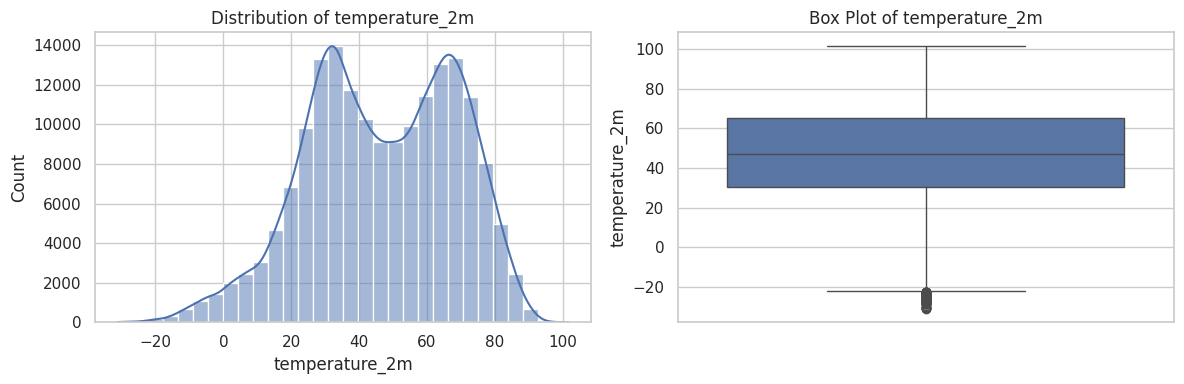

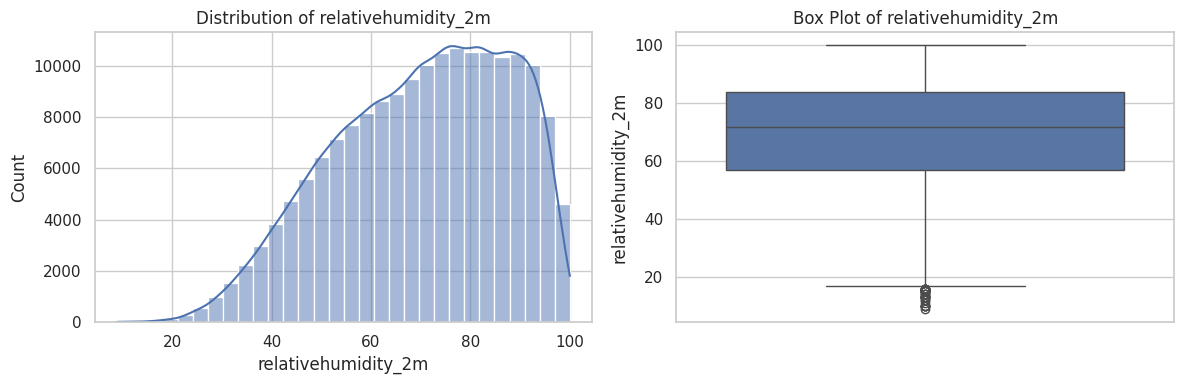

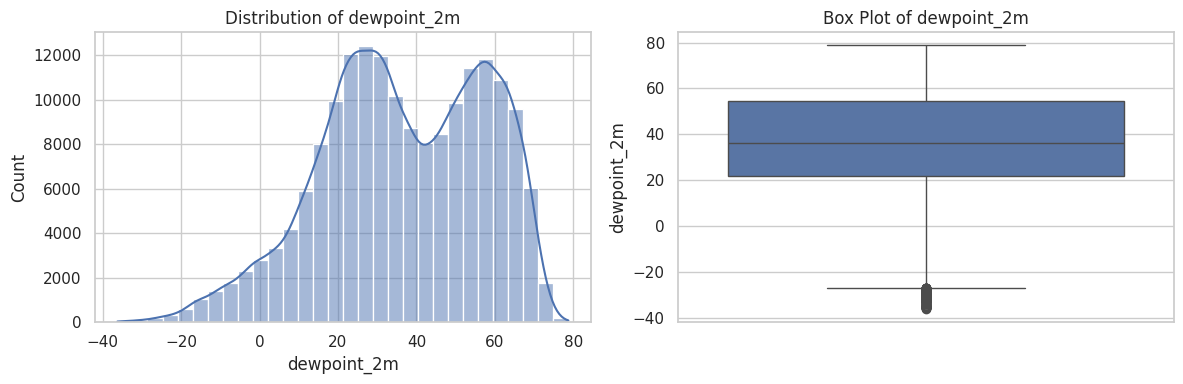

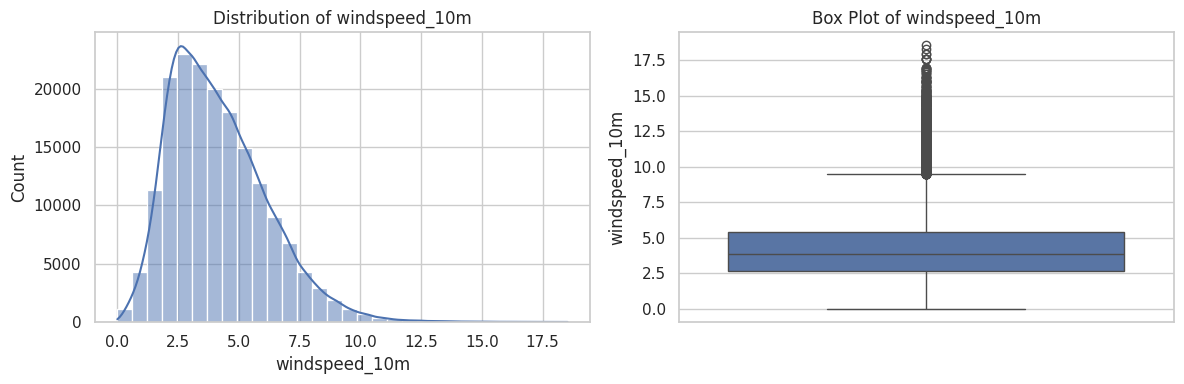

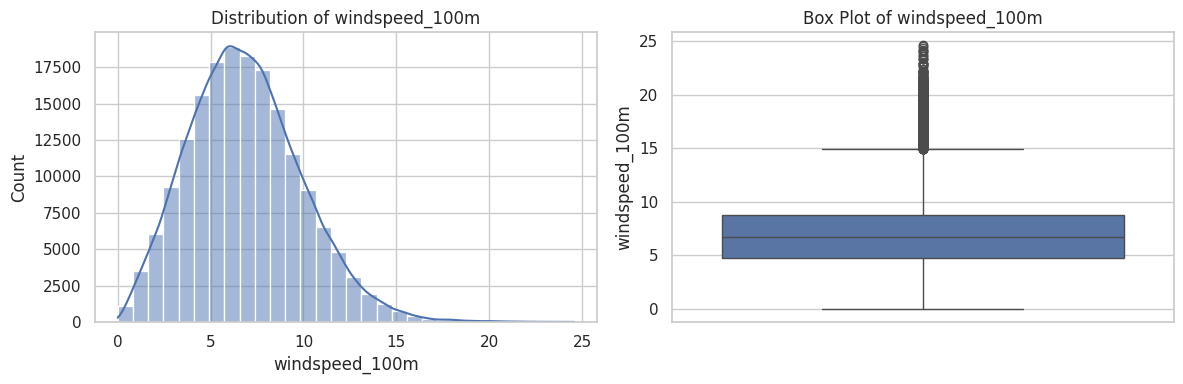

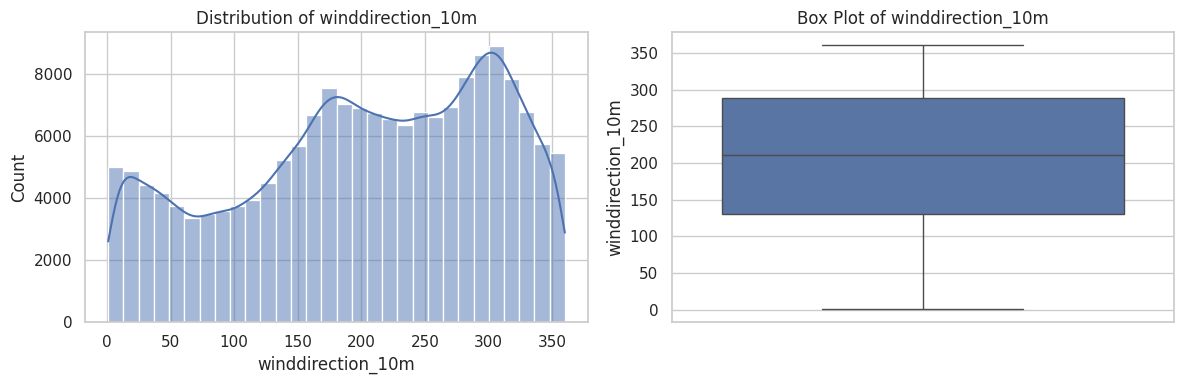

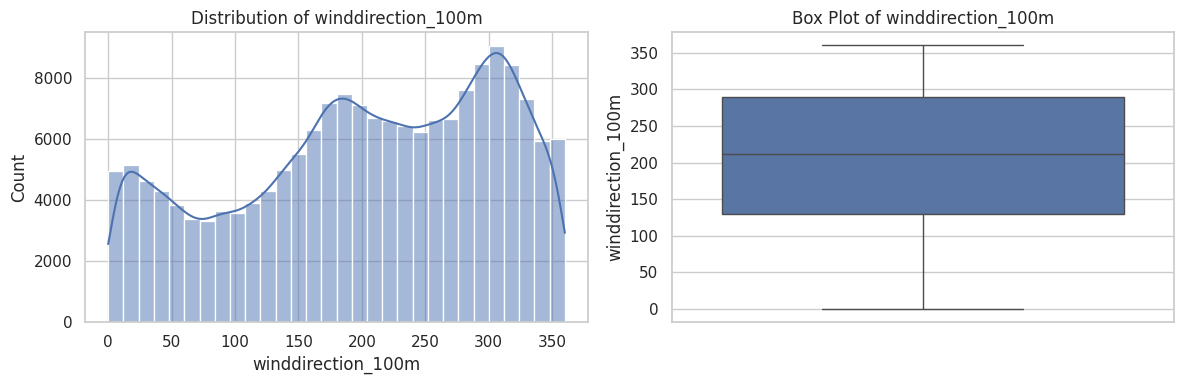

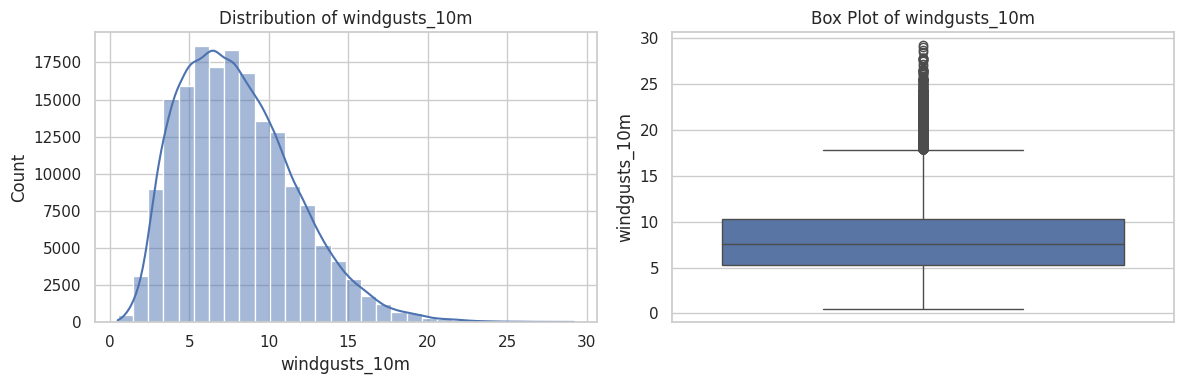

In [43]:
numerical_features = ['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
                      'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
                      'winddirection_100m', 'windgusts_10m']

print("\nDistributions of Numerical Features:")
for col in numerical_features:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(merged_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=merged_data[col])
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

### Categorical Feature: Location

<ipython-input-44-5077979e3ebd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=merged_data, palette='pastel')


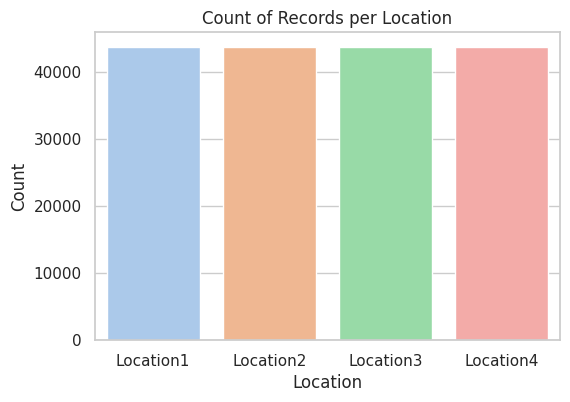

In [44]:
if 'Location' in merged_data.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Location', data=merged_data, palette='pastel')
    plt.xlabel('Location')
    plt.ylabel('Count')
    plt.title('Count of Records per Location')
    plt.show()
else:
    print("\n'Location' column already encoded or removed.")

## Bivariate Analysis

### Numerical Features vs. Power


Scatter Plots of Numerical Features vs. Power:


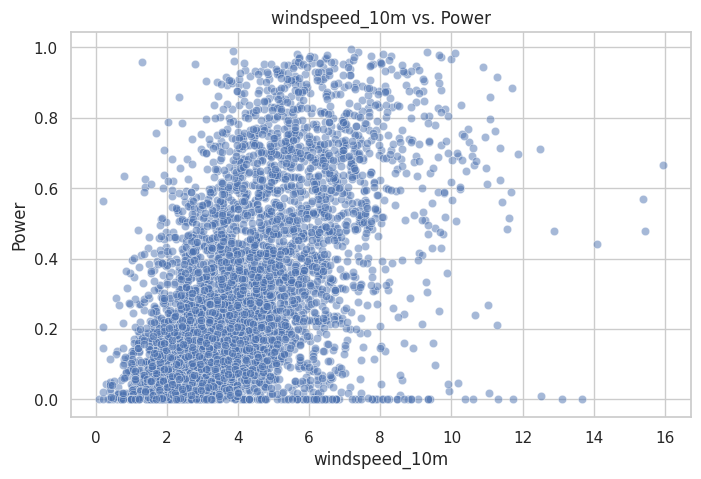

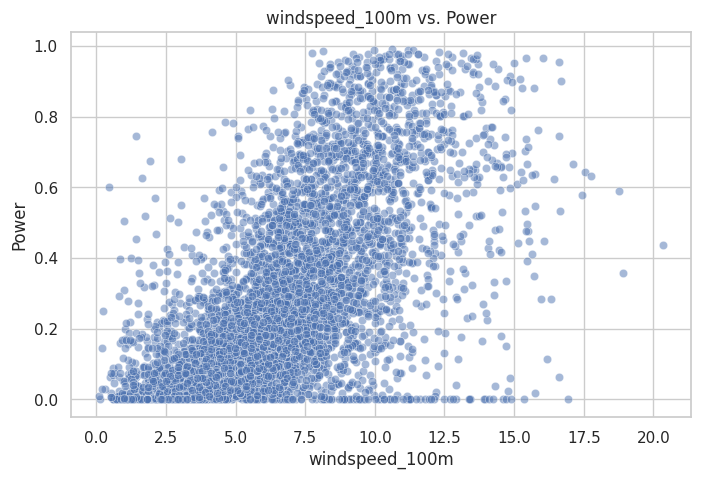

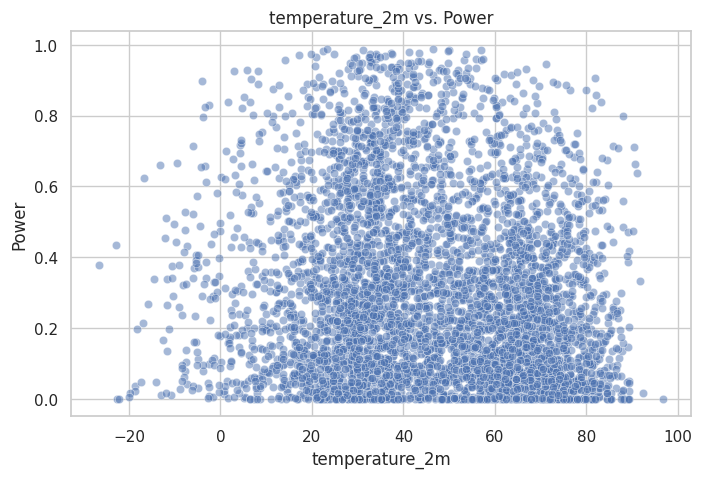

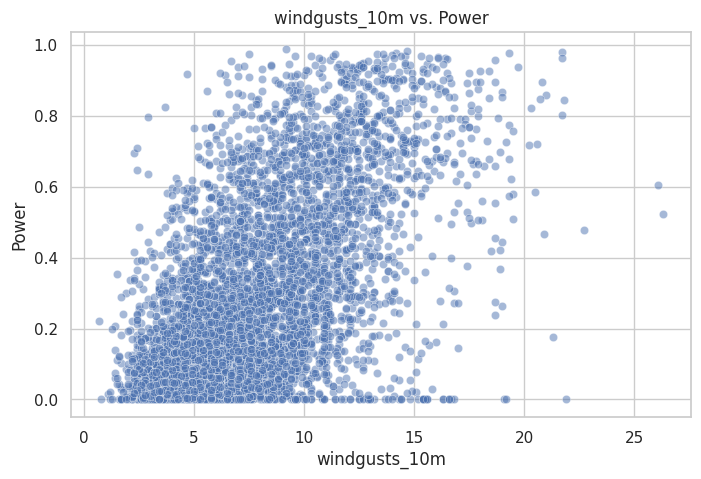


Line Plots of Numerical Features vs. Power:


<ipython-input-45-f902fcd87c81>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


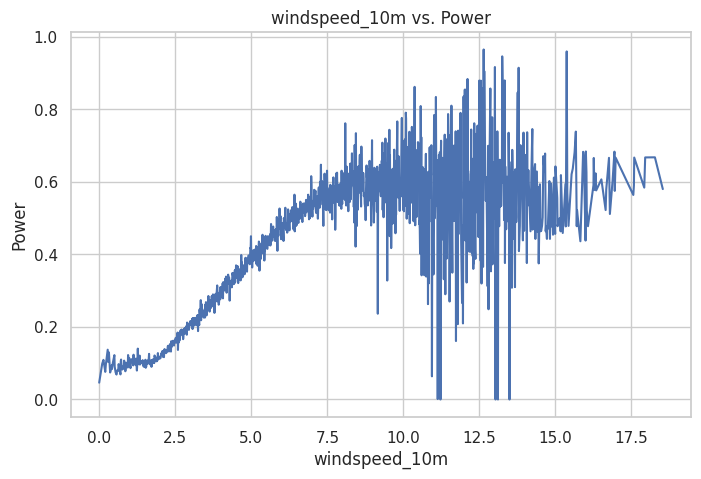

<ipython-input-45-f902fcd87c81>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


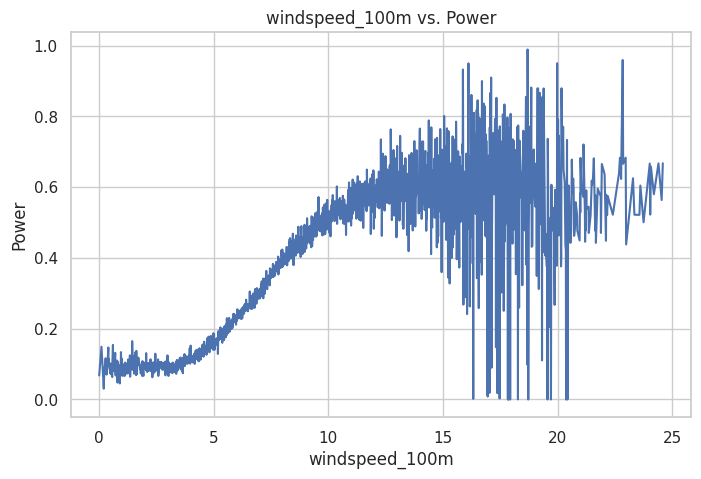

<ipython-input-45-f902fcd87c81>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


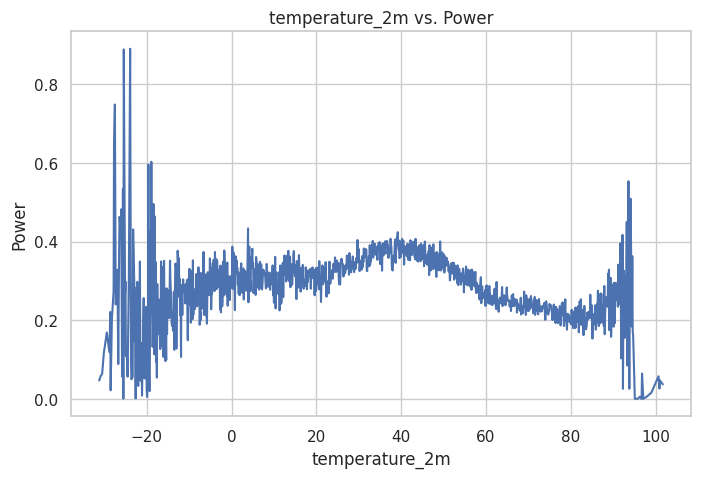

<ipython-input-45-f902fcd87c81>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=col, y='Power', data=merged_data, ci=None)


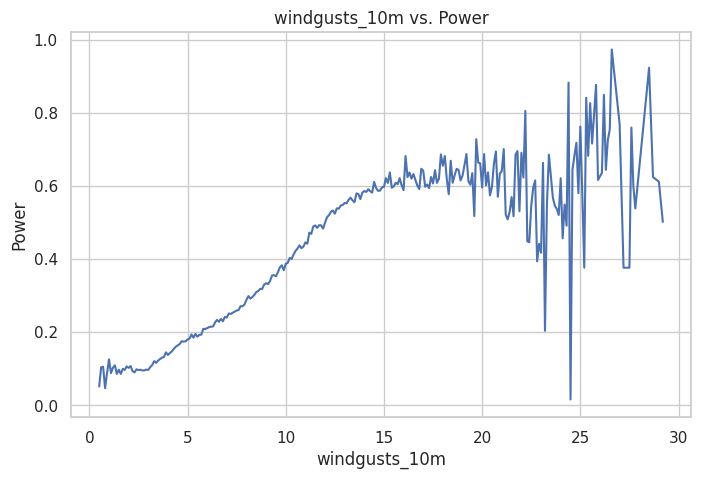

In [45]:
print("\nScatter Plots of Numerical Features vs. Power:")
scatter_features = ['windspeed_10m', 'windspeed_100m', 'temperature_2m', 'windgusts_10m']
for col in scatter_features:
    plt.figure(figsize=(8, 5))

    sample_df = merged_data.sample(min(5000, len(merged_data)))
    sns.scatterplot(x=col, y='Power', data=sample_df, alpha=0.5)
    plt.title(f'{col} vs. Power')
    plt.show()

print("\nLine Plots of Numerical Features vs. Power:")
for col in scatter_features:
    plt.figure(figsize=(8, 5))
    sns.lineplot(x=col, y='Power', data=merged_data, ci=None)
    plt.title(f'{col} vs. Power')
    plt.show()




### Location vs. Power

<ipython-input-46-ea1facff1f04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Power', data=merged_data, palette='viridis')


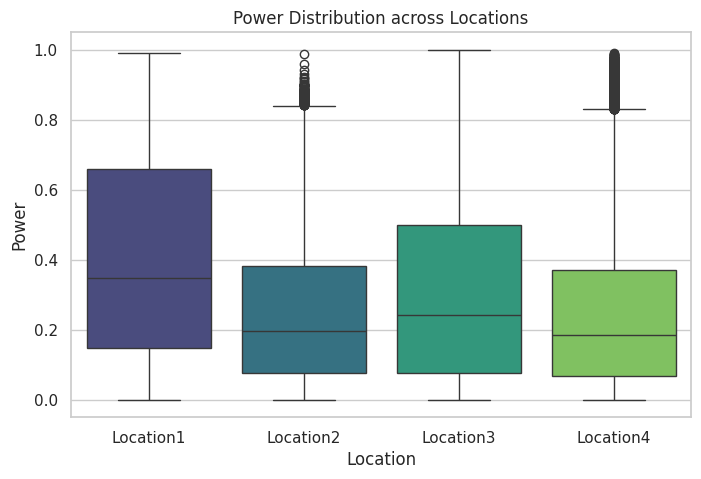

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Location', y='Power', data=merged_data, palette='viridis')
plt.title('Power Distribution across Locations')
plt.show()


<ipython-input-47-0540a1034d32>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Location', y='Power', data=merged_data, palette='deep')


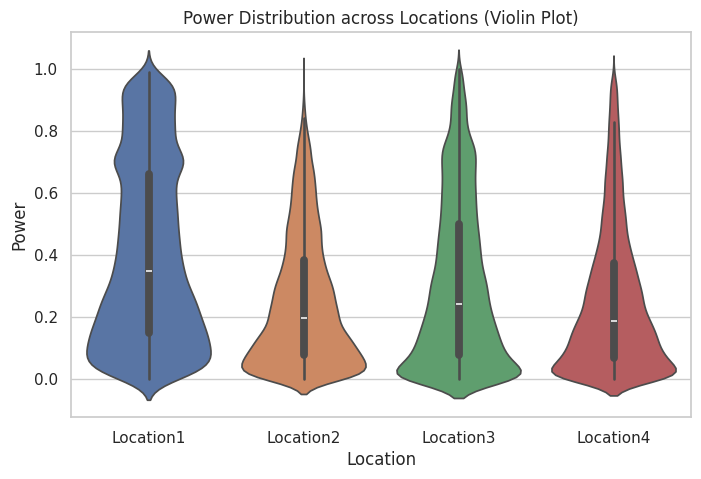

In [47]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='Location', y='Power', data=merged_data, palette='deep')
plt.title('Power Distribution across Locations (Violin Plot)')
plt.show()


<ipython-input-48-94e4ecc51eaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='Power', data=merged_data, palette='bright')


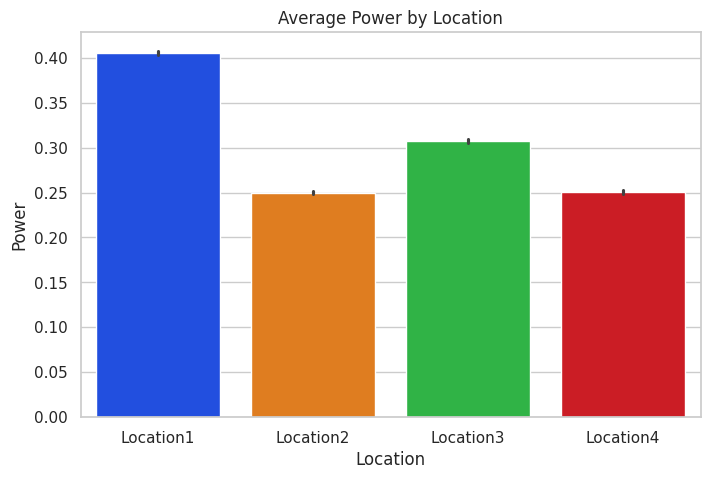

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Location', y='Power', data=merged_data, palette='bright')
plt.title('Average Power by Location')
plt.show()


### Correlation Analysis

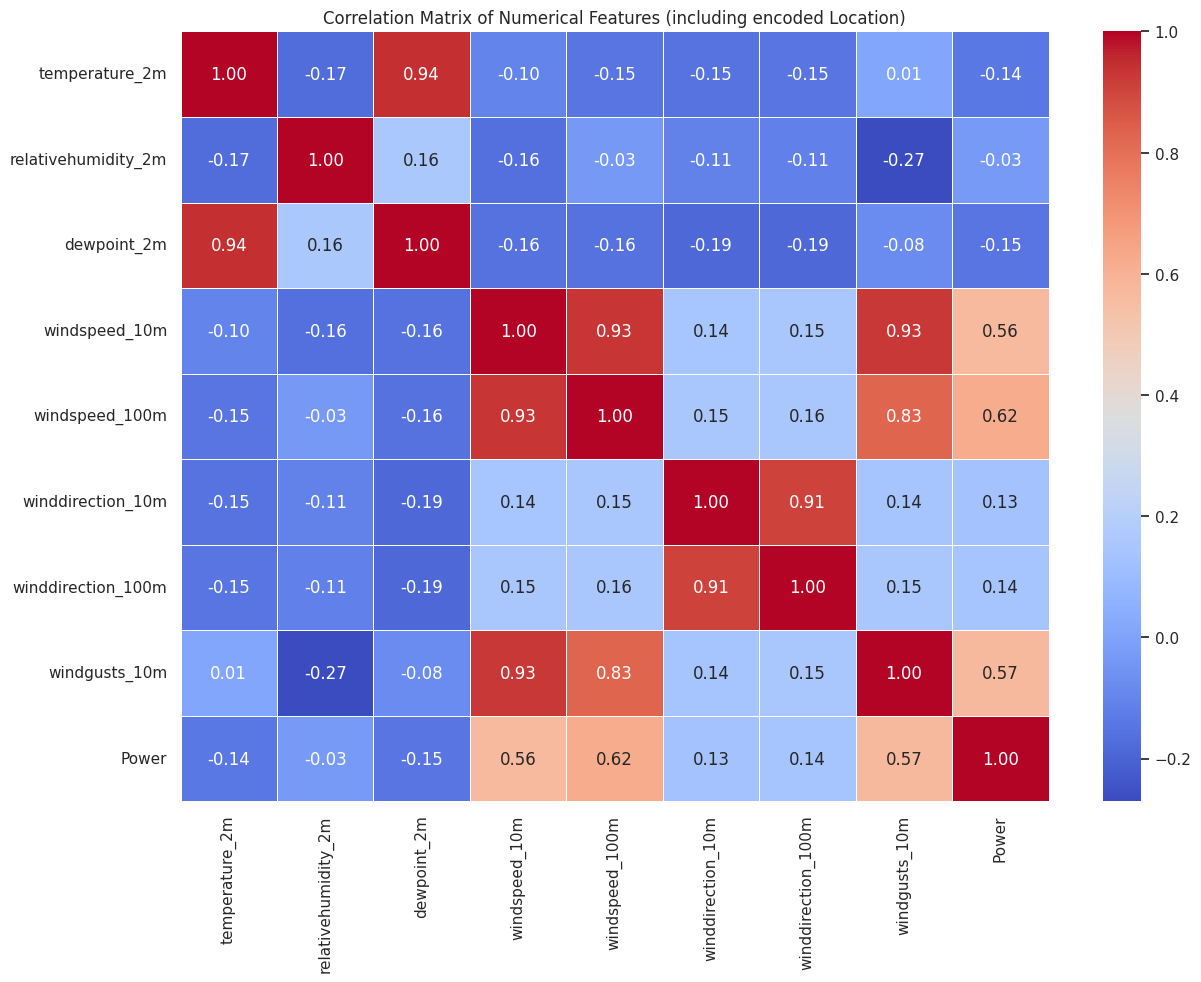


Correlation with Power:
Power                  1.000000
windspeed_100m         0.622108
windgusts_10m          0.568818
windspeed_10m          0.564750
winddirection_100m     0.136620
winddirection_10m      0.128059
relativehumidity_2m   -0.031405
temperature_2m        -0.141187
dewpoint_2m           -0.146789
Name: Power, dtype: float64


In [50]:
# Correlation Matrix
numerical_cols_for_corr = merged_data.select_dtypes(include=np.number).columns
correlation_matrix = merged_data[numerical_cols_for_corr].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (including encoded Location)')
plt.show()

# Correlation with the target variable 'Power'
print("\nCorrelation with Power:")
print(correlation_matrix['Power'].sort_values(ascending=False))

# Categorical Feature Encoding

## Location Encoding

Convert the 'Location' column into numerical format using One-Hot Encoding.

In [51]:
if 'Location' in merged_data.columns:
    merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True, dtype=int)
    print("\n'Location' column encoded using One-Hot Encoding.")
    merged_data.head()
else:
    print("\n'Location' column seems to be already encoded or was removed.")
    merged_data.head()


'Location' column encoded using One-Hot Encoding.


# Final Data Review

In [52]:
print("\nFinal DataFrame Info after preprocessing:")
merged_data.info()


Final DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  int64  
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  int64  
 6   winddirection_100m   175200 non-null  int64  
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location_Location2   175200 non-null  int64  
 10  Location_Location3   175200 non-null  int64  
 11  Location_Location4   175200 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 16.0 MB


In [53]:
print("\nFinal DataFrame Head:")
merged_data.head()


Final DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,0,0,0
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,0,0,0
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,0,0,0
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,0,0,0
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,0,0,0


Standardization and Normalization

In [57]:
# Standardization
from sklearn.preprocessing import StandardScaler

# List the numerical features to scale
numerical_cols_for_corr = merged_data.select_dtypes(include=np.number).columns

# Using the StandardScaler to fit-transform
scaler = StandardScaler()
df_standardized =  merged_data.copy()
df_standardized[numerical_cols_for_corr] = scaler.fit_transform(df_standardized[numerical_cols_for_corr])

# Display
print("\nStandardized DataFrame Head:")
df_standardized.head()




Standardized DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,-0.824797,0.856757,-0.574031,-1.350261,-1.846063,-0.557910,-0.392707,-1.835037,-0.543785,-0.57735,-0.57735,-0.57735
1,-0.829340,0.914472,-0.564477,-1.042214,-0.949204,-0.507729,-0.432435,-1.005730,-0.625783,-0.57735,-0.57735,-0.57735
2,-0.902026,1.203045,-0.574031,-1.419821,-1.346713,-0.537837,-0.511892,-1.337453,-0.707392,-0.57735,-0.57735,-0.57735
3,-0.874768,1.029901,-0.583585,-1.419821,-1.376280,-1.441100,-0.958837,-1.779750,-0.789390,-0.57735,-0.57735,-0.57735
4,-0.879311,1.029901,-0.593139,-0.838505,-0.804655,-1.441100,-1.167412,-1.116304,-0.870999,-0.57735,-0.57735,-0.57735


In [58]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

# Using the MinMaxScaler to fit-transform
scaler = MinMaxScaler()
df_normalized = merged_data.copy()
df_normalized[numerical_cols_for_corr] = scaler.fit_transform(df_normalized[numerical_cols_for_corr])

# Display
print("\nNormalized DataFrame Head:")
df_normalized.head()



Normalized DataFrame Head:


,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,0.449210,0.835165,0.528285,0.077712,0.051240,0.403900,0.450000,0.031359,0.163598,0.0,0.0,0.0
1,0.448457,0.846154,0.530026,0.111171,0.162261,0.417827,0.438889,0.135889,0.142485,0.0,0.0,0.0
2,0.436418,0.901099,0.528285,0.070157,0.113054,0.409471,0.416667,0.094077,0.121473,0.0,0.0,0.0
3,0.440933,0.868132,0.526545,0.070157,0.109394,0.158774,0.291667,0.038328,0.100360,0.0,0.0,0.0
4,0.440181,0.868132,0.524804,0.133297,0.180155,0.158774,0.233333,0.121951,0.079348,0.0,0.0,0.0


# Week 1 Complete

The week 1 notebook includes:
*   Initial data loading and merging.
*   Removal of the 'Time' column.
*   Univariate analysis (distributions of target and features).
*   Bivariate analysis (relationships between features and target, correlations).
*   Categorical encoding for 'Location'.

The `merged_data` DataFrame is ready for further steps like feature scaling and model building and other functionalities.